In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
# First I am reading into the park boundaries data set in geojson

In [3]:
parks = gpd.read_file('../data/Metro Parks Boundaries (GIS).geojson')
print(parks.crs)
parks.head( )

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [4]:
type(parks)

geopandas.geodataframe.GeoDataFrame

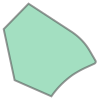

In [5]:
parks.loc[1, 'geometry']

In [6]:
print(parks.loc[0, 'geometry'])

MULTIPOLYGON (((-86.95546524763979 36.07930145579854, -86.95577768867267 36.0791390934377, -86.95554165522448 36.07881679726515, -86.95555002481612 36.07876336296327, -86.95547131924887 36.07872072961796, -86.95532248405858 36.07851744306786, -86.95528618171004 36.07845372197693, -86.95525327758185 36.07839107173579, -86.95523923349029 36.07834887403824, -86.95522977080738 36.07832175489392, -86.95522131619775 36.07829407526238, -86.95521421491281 36.07826638490727, -86.95520846364511 36.07823840895774, -86.95520406570714 36.07821042318611, -86.95520101888307 36.0781821509104, -86.9551993253869 36.07815386881271, -86.95519898519579 36.07812557509128, -86.95519999833 36.07809727154806, -86.95520236476608 36.07806895638105, -86.9552057503346 36.07804090893737, -86.955210827808 36.0780128471868, -86.9550086936845 36.07817351059672, -86.95500864747362 36.07817345327956, -86.95499806745696 36.07816107206578, -86.9549716235682 36.07813012168268, -86.95500338104712 36.07803322156244, -86.9550

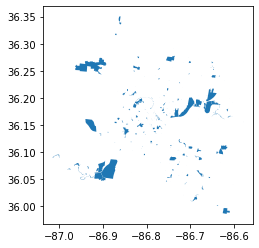

In [7]:
parks.plot();

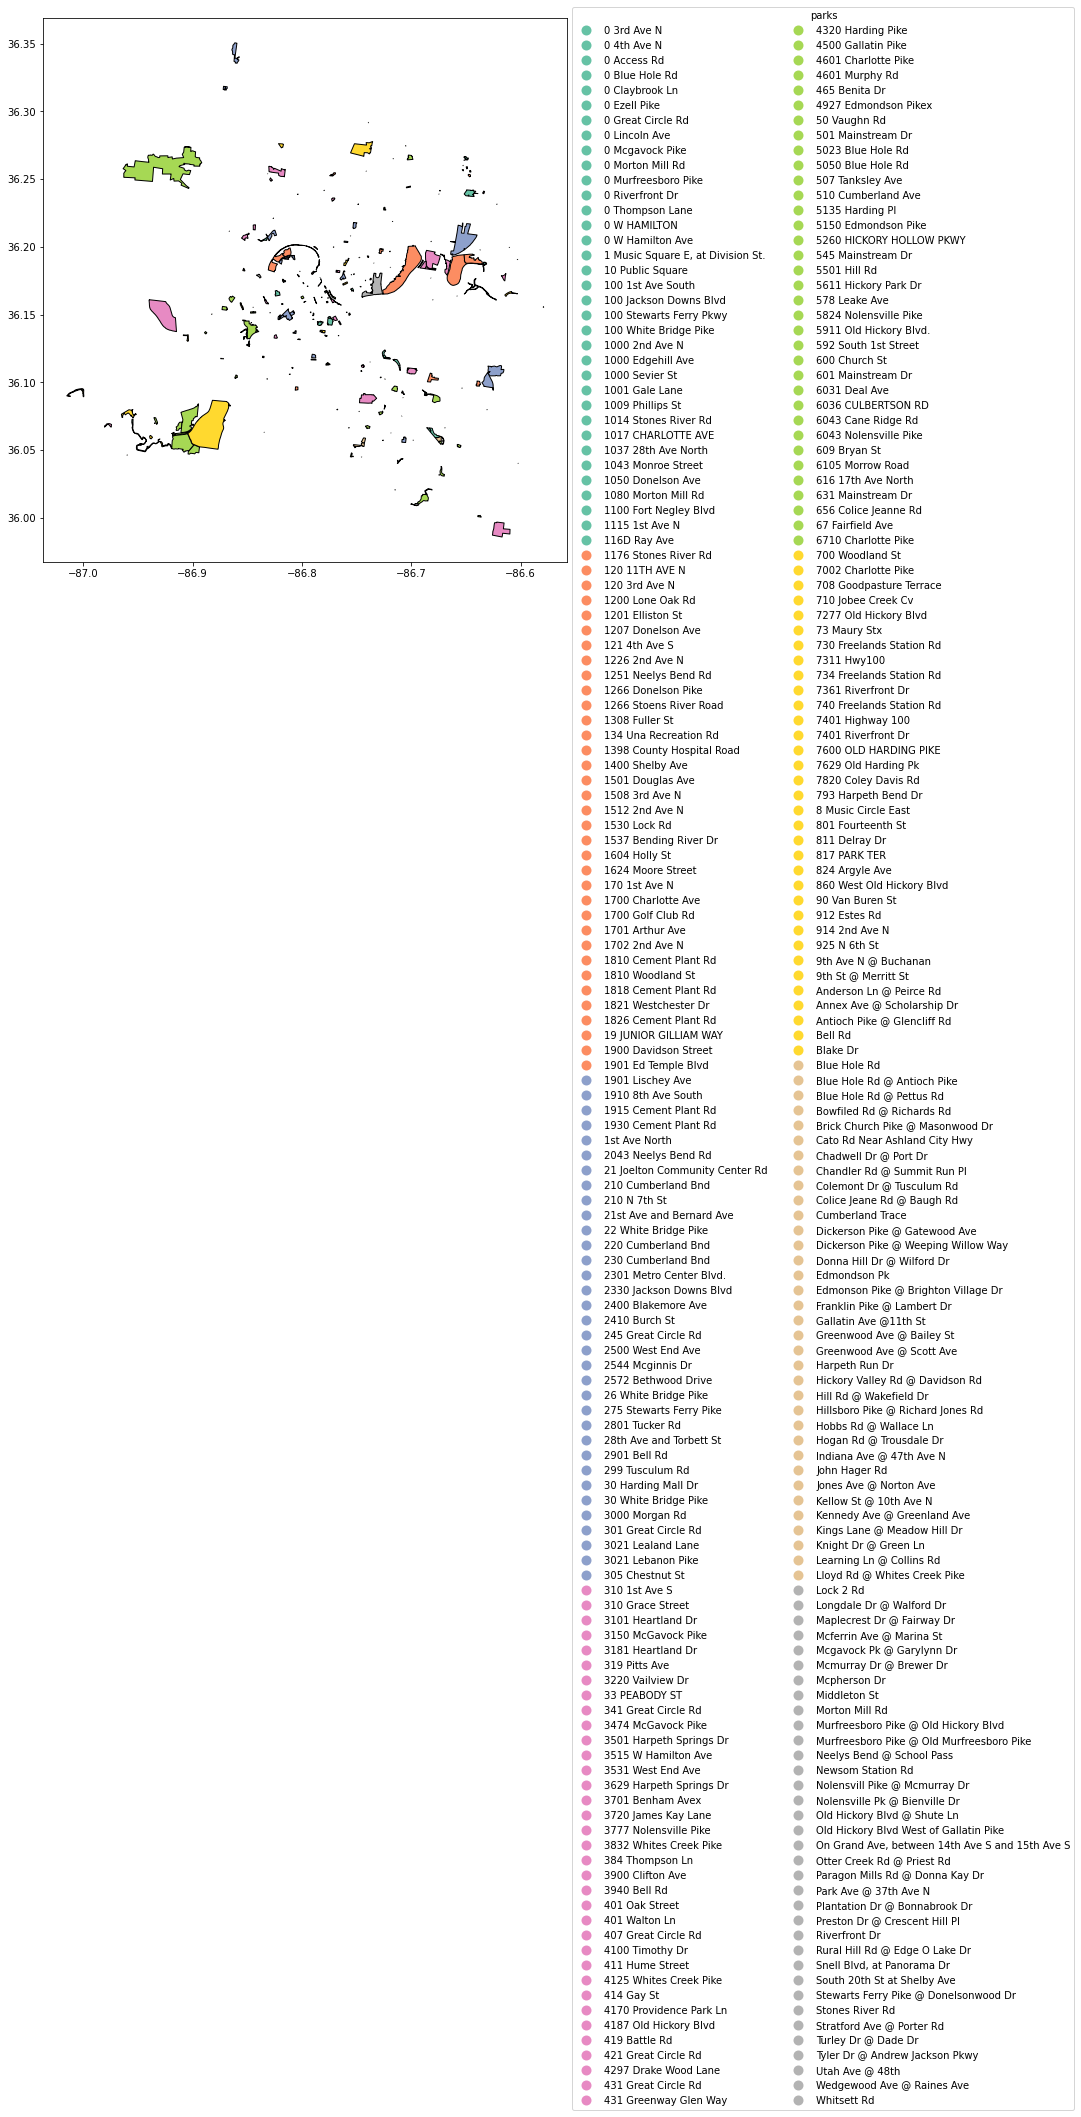

In [8]:
leg_kwds = {'title': 'parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

parks.plot(column = 'address', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [9]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   acres       287 non-null    object  
 1   name        183 non-null    object  
 2   year_estab  287 non-null    object  
 3   common_nam  287 non-null    object  
 4   status      287 non-null    object  
 5   address     283 non-null    object  
 6   lon         287 non-null    object  
 7   lat         287 non-null    object  
 8   descriptio  103 non-null    object  
 9   geometry    287 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 22.5+ KB


In [10]:
# Now I am reading into the water fountain dataset in csv

In [11]:
water_fountains = pd.read_csv('../data/WaterFountains_HydrationSystems.csv')

In [12]:
print(water_fountains.shape)

(73, 10)


In [13]:
water_fountains.head()

,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA
0,POINT (-86.89425345576078 36.26250455840148),"45,921",-86.894253,Beaman Water Fountain,36.262505,NaN,Y,Fountain/Bottle filler/ADA,1,Y
1,POINT (-86.90622747033689 36.06089914863129),"45,937",-86.906227,Edwin Nature Center Water Fountain,36.060899,Restrooms Breezeway,N,Bottle Filler/ADA,1,Y
2,POINT (-86.86727565917963 36.08310102493863),"45,964",-86.867276,Percy Warner Belle Meade Gates Water Fountain,36.083101,Belle Meade Gates,Y,ADA Bowl,1,Y
3,POINT (-86.8637899391243 36.161795831166906),"45,992",-86.863790,West Park Water Fountain,36.161796,Ballfield,N,Single with foot pedal,1,N
4,POINT (-86.84589094125035 36.151393836128406),"46,012",-86.845891,Richland Park Water Fountain,36.151394,Playground,N,Single with foot pedal,1,N


In [14]:
water_fountains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   the_geom  73 non-null     object 
 1   OBJECTID  73 non-null     object 
 2   LAT       73 non-null     float64
 3   NAME      73 non-null     object 
 4   LON       73 non-null     float64
 5   Location  65 non-null     object 
 6   Dog       73 non-null     object 
 7   FeatType  73 non-null     object 
 8   Cnt       73 non-null     int64  
 9   ADA       73 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.8+ KB


<font color = 'red'> Let's reverse/correct the LAT and LON for water_fountains by renaming the colums
    <font/>

In [15]:
#water_fountains = water_fountains.rename(columns={'the_geom':'the_geom', 'OBJECTID':'OBJECTID', 'LAT':'LON', 'NAME':'NAME', 'LON':'LAT', 'Location':'Location', 'Dog':'Dog','FeatType':'FeatType', 'Cnt':'Cnt', 'ADA':'ADA'})
#water_fountains.head()

In [16]:
## Here I am adding the geometry column to get the geospacial Latitude and Longitude. 
# CAREFUL: in the dataset LAT and LON are reversed

In [17]:
water_fountains['mgeometry'] = water_fountains.apply(lambda x: Point((float(x.LAT), 
                                                         float(x.LON))), 
                                        axis=1)
water_fountains.head(3)

,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA,mgeometry
0,POINT (-86.89425345576078 36.26250455840148),"45,921",-86.894253,Beaman Water Fountain,36.262505,NaN,Y,Fountain/Bottle filler/ADA,1,Y,POINT (-86.89425346 36.26250456)
1,POINT (-86.90622747033689 36.06089914863129),"45,937",-86.906227,Edwin Nature Center Water Fountain,36.060899,Restrooms Breezeway,N,Bottle Filler/ADA,1,Y,POINT (-86.90622747 36.06089915)
2,POINT (-86.86727565917963 36.08310102493863),"45,964",-86.867276,Percy Warner Belle Meade Gates Water Fountain,36.083101,Belle Meade Gates,Y,ADA Bowl,1,Y,POINT (-86.86727566 36.08310102)


In [18]:
water_fountains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   the_geom   73 non-null     object 
 1   OBJECTID   73 non-null     object 
 2   LAT        73 non-null     float64
 3   NAME       73 non-null     object 
 4   LON        73 non-null     float64
 5   Location   65 non-null     object 
 6   Dog        73 non-null     object 
 7   FeatType   73 non-null     object 
 8   Cnt        73 non-null     int64  
 9   ADA        73 non-null     object 
 10  mgeometry  73 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 6.4+ KB


In [19]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
#water_fountains.crs

In [21]:
# let's match the CRS and convert it into a geodataframe
water_fountains_geo = gpd.GeoDataFrame(water_fountains, 
                           crs = parks.crs, 
                           geometry = water_fountains['mgeometry'])

In [22]:
type(water_fountains_geo)

geopandas.geodataframe.GeoDataFrame

In [23]:
water_fountains_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
# now let's join

In [25]:
water_fountains_geo.head()

,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA,mgeometry,geometry
0,POINT (-86.89425345576078 36.26250455840148),"45,921",-86.894253,Beaman Water Fountain,36.262505,NaN,Y,Fountain/Bottle filler/ADA,1,Y,POINT (-86.89425346 36.26250456),POINT (-86.89425 36.26250)
1,POINT (-86.90622747033689 36.06089914863129),"45,937",-86.906227,Edwin Nature Center Water Fountain,36.060899,Restrooms Breezeway,N,Bottle Filler/ADA,1,Y,POINT (-86.90622747 36.06089915),POINT (-86.90623 36.06090)
2,POINT (-86.86727565917963 36.08310102493863),"45,964",-86.867276,Percy Warner Belle Meade Gates Water Fountain,36.083101,Belle Meade Gates,Y,ADA Bowl,1,Y,POINT (-86.86727566 36.08310102),POINT (-86.86728 36.08310)
3,POINT (-86.8637899391243 36.161795831166906),"45,992",-86.863790,West Park Water Fountain,36.161796,Ballfield,N,Single with foot pedal,1,N,POINT (-86.86378994 36.16179583),POINT (-86.86379 36.16180)
4,POINT (-86.84589094125035 36.151393836128406),"46,012",-86.845891,Richland Park Water Fountain,36.151394,Playground,N,Single with foot pedal,1,N,POINT (-86.84589094 36.15139384),POINT (-86.84589 36.15139)


In [26]:
water_fountains_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   the_geom   73 non-null     object  
 1   OBJECTID   73 non-null     object  
 2   LAT        73 non-null     float64 
 3   NAME       73 non-null     object  
 4   LON        73 non-null     float64 
 5   Location   65 non-null     object  
 6   Dog        73 non-null     object  
 7   FeatType   73 non-null     object  
 8   Cnt        73 non-null     int64   
 9   ADA        73 non-null     object  
 10  mgeometry  73 non-null     object  
 11  geometry   73 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(8)
memory usage: 7.0+ KB


<font color = 'red'> Here I am dropping some columns for water_fountains
    <font/>

In [27]:
water_fountains_geo = water_fountains_geo[['NAME', 'Location', 'Dog', 'FeatType', 'geometry', 'LAT', 'LON']]
water_fountains_geo.head()

,NAME,Location,Dog,FeatType,geometry,LAT,LON
0,Beaman Water Fountain,NaN,Y,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),-86.894253,36.262505
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,Bottle Filler/ADA,POINT (-86.90623 36.06090),-86.906227,36.060899
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,ADA Bowl,POINT (-86.86728 36.08310),-86.867276,36.083101
3,West Park Water Fountain,Ballfield,N,Single with foot pedal,POINT (-86.86379 36.16180),-86.863790,36.161796
4,Richland Park Water Fountain,Playground,N,Single with foot pedal,POINT (-86.84589 36.15139),-86.845891,36.151394


In [28]:
parks.head()

,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [29]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   acres       287 non-null    object  
 1   name        183 non-null    object  
 2   year_estab  287 non-null    object  
 3   common_nam  287 non-null    object  
 4   status      287 non-null    object  
 5   address     283 non-null    object  
 6   lon         287 non-null    object  
 7   lat         287 non-null    object  
 8   descriptio  103 non-null    object  
 9   geometry    287 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 22.5+ KB


<font color = 'red'> Here I am dropping some columns for parks
    <font/>

In [30]:
parks = parks[['name', 'address', 'descriptio', 'lat', 'lon', 'geometry']]
parks.head()

,name,address,descriptio,lat,lon,geometry
0,Harpeth River Park,7820 Coley Davis Rd,Harpeth River State Park has much historical a...,36.07738249,-86.9592214,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,Harpeth Knoll Park,708 Goodpasture Terrace,"Huge grassy field with playground, and shade s...",36.05942777,-86.93815537,"MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,Bellevue Park,656 Colice Jeanne Rd,"Bellevue Park, known as Red Caboose Park, is p...",36.07159731,-86.93354496,"MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,Bells Bend Park,4187 Old Hickory Blvd,"Located in western Davidson County, this park ...",36.15016925,-86.92646294,"MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,Alvin G. Beaman Park,5911 Old Hickory Blvd.,Beaman Park provides education and awareness p...,36.26075833,-86.91984207,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [31]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        183 non-null    object  
 1   address     283 non-null    object  
 2   descriptio  103 non-null    object  
 3   lat         287 non-null    object  
 4   lon         287 non-null    object  
 5   geometry    287 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 13.6+ KB


In [32]:
water_fountains_in_parks = gpd.sjoin(water_fountains_geo, parks, op = 'within')
water_fountains_in_parks.head()

,NAME,Location,Dog,FeatType,geometry,LAT,LON,index_right,name,address,descriptio,lat,lon
0,Beaman Water Fountain,NaN,Y,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),-86.894253,36.262505,4,Alvin G. Beaman Park,5911 Old Hickory Blvd.,Beaman Park provides education and awareness p...,36.26075833,-86.91984207
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,Bottle Filler/ADA,POINT (-86.90623 36.06090),-86.906227,36.060899,5,Edwin Warner Park,50 Vaughn Rd,"Edwin Warner Park is a great, multi-recreation...",36.05688279,-86.9074396
29,Edwin Warner Dog Park Water Fountain,Dog Park,Y,Dog Only,POINT (-86.90162 36.05196),-86.901620,36.051956,5,Edwin Warner Park,50 Vaughn Rd,"Edwin Warner Park is a great, multi-recreation...",36.05688279,-86.9074396
30,Edwin Warner Concession Water Fountain,WNSL Concessions,N,Standard/ADA,POINT (-86.89817 36.04998),-86.898174,36.049983,5,Edwin Warner Park,50 Vaughn Rd,"Edwin Warner Park is a great, multi-recreation...",36.05688279,-86.9074396
69,Harpeth River Greenway,Butler Field Trail Head,Y,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133),-86.916171,36.051330,5,Edwin Warner Park,50 Vaughn Rd,"Edwin Warner Park is a great, multi-recreation...",36.05688279,-86.9074396


In [33]:
water_fountains_in_parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 61 entries, 0 to 68
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NAME         61 non-null     object  
 1   Location     60 non-null     object  
 2   Dog          61 non-null     object  
 3   FeatType     61 non-null     object  
 4   geometry     61 non-null     geometry
 5   LAT          61 non-null     float64 
 6   LON          61 non-null     float64 
 7   index_right  61 non-null     int64   
 8   name         59 non-null     object  
 9   address      61 non-null     object  
 10  descriptio   53 non-null     object  
 11  lat          61 non-null     object  
 12  lon          61 non-null     object  
dtypes: float64(2), geometry(1), int64(1), object(9)
memory usage: 6.7+ KB


In [34]:
water_fountains_in_parks['name'].value_counts()

Riverfront Park                5
Edwin Warner Park              4
Cedar Hill                     4
Cane Ridge Park                3
Fannie Mae Dees Park           3
Shelby Bottoms Park            3
Shelby Park                    3
Sevier Park                    2
Two Rivers Park                2
McCabe Park                    2
West Park                      1
Bellevue Park                  1
Hermitage Park                 1
Elmington Park                 1
Alvin G. Beaman Park           1
Centennial Park                1
Buena Vista Park               1
Elizabeth Park                 1
Seven Oaks Park                1
Cleveland Park                 1
City Cemetery                  1
E. N. Peeler Park              1
Fort Negley                    1
Public Square Park             1
Cumberland Park                1
Bordeaux-Timothy Drive Park    1
Isaac Litton School Park       1
Percy Warner Park              1
Woodmont Park                  1
Providence Park                1
Richland P

In [35]:
water_fountains_in_RiverfrontPark = water_fountains_in_parks.loc[water_fountains_in_parks['name'] == 'Riverfront Park']
water_fountains_in_RiverfrontPark.shape

(5, 13)

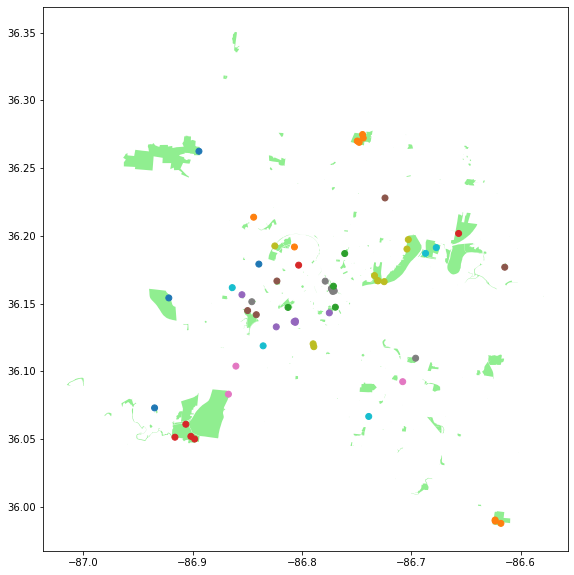

In [36]:
#fig, ax = matplotlib.subplots()
ax = parks.plot(figsize = (10, 10), color = 'lightgreen')
water_fountains_in_parks.plot( ax = ax, column = 'name')
plt.show();

In [37]:
type(water_fountains_in_parks)

geopandas.geodataframe.GeoDataFrame

In [38]:
water_fountains_in_parks.centroid

<ipython-input-38-6da881c2c630>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_fountains_in_parks.centroid


0     POINT (-86.89425 36.26250)
1     POINT (-86.90623 36.06090)
29    POINT (-86.90162 36.05196)
30    POINT (-86.89817 36.04998)
69    POINT (-86.91617 36.05133)
                 ...            
52    POINT (-86.76952 36.14734)
54    POINT (-86.82486 36.19259)
55    POINT (-86.77879 36.16657)
57    POINT (-86.64759 36.17322)
68    POINT (-86.94508 36.05899)
Length: 61, dtype: geometry

In [39]:
#find the center of the larger (more southern) polygon and look at it
center = water_fountains_in_parks.geometry.centroid[71]
print(center)

POINT (-86.77120997999999 36.16014227)


<ipython-input-39-935d2137e9fc>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = water_fountains_in_parks.geometry.centroid[71]


In [40]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.16014227, -86.77120998]


In [41]:
#create our map of the water fountains within the parks and show it
Park_map = folium.Map(location =  area_center, zoom_start = 12)
water_fountains_in_parks

,NAME,Location,Dog,FeatType,geometry,LAT,LON,index_right,name,address,descriptio,lat,lon
0,Beaman Water Fountain,NaN,Y,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),-86.894253,36.262505,4,Alvin G. Beaman Park,5911 Old Hickory Blvd.,Beaman Park provides education and awareness p...,36.26075833,-86.91984207
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,Bottle Filler/ADA,POINT (-86.90623 36.06090),-86.906227,36.060899,5,Edwin Warner Park,50 Vaughn Rd,"Edwin Warner Park is a great, multi-recreation...",36.05688279,-86.9074396
29,Edwin Warner Dog Park Water Fountain,Dog Park,Y,Dog Only,POINT (-86.90162 36.05196),-86.901620,36.051956,5,Edwin Warner Park,50 Vaughn Rd,"Edwin Warner Park is a great, multi-recreation...",36.05688279,-86.9074396
30,Edwin Warner Concession Water Fountain,WNSL Concessions,N,Standard/ADA,POINT (-86.89817 36.04998),-86.898174,36.049983,5,Edwin Warner Park,50 Vaughn Rd,"Edwin Warner Park is a great, multi-recreation...",36.05688279,-86.9074396
69,Harpeth River Greenway,Butler Field Trail Head,Y,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133),-86.916171,36.051330,5,Edwin Warner Park,50 Vaughn Rd,"Edwin Warner Park is a great, multi-recreation...",36.05688279,-86.9074396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,City Cemetery Water Fountain,Office Building,N,Single with foot pedal,POINT (-86.76952 36.14734),-86.769521,36.147343,109,City Cemetery,401 Oak Street,None,36.182389,-86.853247
54,Metro Center Levee Golf Trailhead Water Fountain,Trailhead,Y,Dog Only,POINT (-86.82486 36.19259),-86.824858,36.192587,20,Ted Rhodes Park,1901 Ed Temple Blvd,18 hole golf course.,36.1905823,-86.82113034
55,Public Square Water Fountain,3rd Ave Steps Courthouse,Y,Standard/ADA/Bottle Filler,POINT (-86.77879 36.16657),-86.778787,36.166566,49,Public Square Park,10 Public Square,Park located at Nashville City Hall.,36.16684566,-86.7780877
57,Stones River - YMCA Trailhead Water Fountain,Trailhead,N,Standard/ADA/Bottle Filler,POINT (-86.64759 36.17322),-86.647589,36.173224,278,None,3021 Lebanon Pike,None,0,0


In [42]:
i = 0
for row_index, row_values in water_fountains_in_parks.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
NAME                                       Beaman Water Fountain
Location                                                     NaN
Dog                                                            Y
FeatType                              Fountain/Bottle filler/ADA
geometry                        POINT (-86.89425346 36.26250456)
LAT                                                   -86.894253
LON                                                    36.262505
index_right                                                    4
name                                        Alvin G. Beaman Park
address                                   5911 Old Hickory Blvd.
descriptio     Beaman Park provides education and awareness p...
lat                                                  36.26075833
lon                                                 -86.91984207
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
NAME                          Edwin Nature Center Water

In [44]:
#draw the water fountains maps
parks_map = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(water_fountains_in_parks).add_to(parks_map)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in water_fountains_in_parks.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['name'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(parks_map)
parks_map.save('../maps/map_water_fountains_in_parks.html')

#display our map
parks_map